In [ ]:
from astropy.cosmology import WMAP9 as cosmo1 #Modelo del universo (este tiene fija la cosmologia)
from astropy.cosmology import Planck18 as cosmo2 #Otro Modelo cosmologico
from astropy.cosmology import FlatLambdaCDM #Modelo del universo con energia oscura (usaremos esta, no tiene fija la cosmologia)
from astropy import units as u
import scipy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt




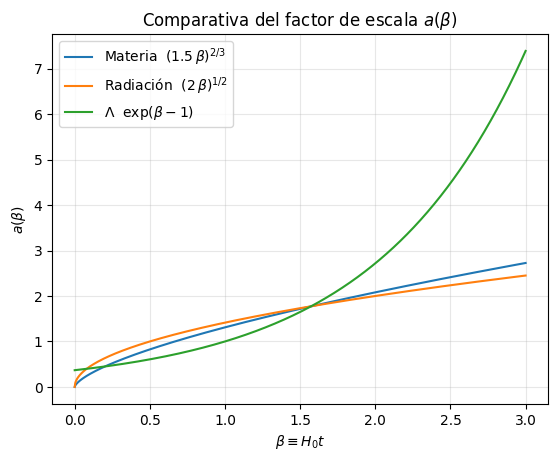

In [ ]:
# Comparativa a(β) con β = H0 t y t0 = 1/H0
# Materia:   a(β) = (1.5 β)^{2/3}
# Radiación: a(β) = (2 β)^{1/2}
# Λ:         a(β) = exp(β - 1)

import numpy as np
import matplotlib.pyplot as plt


# Modelos analíticos en función de β
a_m = (1.5 * beta) ** (2.0/3.0)   # Materia (EdS)
a_r = np.sqrt(2.0 * beta)         # Radiación
a_L = np.exp(beta - 1.0)          # de Sitter (a(β=1)=1)

# Gráfico comparativo en una sola figura
plt.figure()
plt.plot(beta, a_m, label="Materia  $(1.5\\,\\beta)^{2/3}$")
plt.plot(beta, a_r, label="Radiación  $(2\\,\\beta)^{1/2}$")
plt.plot(beta, a_L, label="Λ  $\\exp(\\beta-1)$")


plt.xlabel(r"$\beta \equiv H_0 t$")
plt.ylabel(r"$a(\beta)$")
plt.title("Comparativa del factor de escala $a(\\beta)$")
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()



In [ ]:
from astropy import units as u
import numpy as np
from scipy.integrate import quad
import pandas as pd


def omega_redshift(*,omega_m0,omega_rad0,omega_lambda0,omega_k0):
    def w_z(z):
        w_m = omega_m0*(1+z)**3
        w_rad = omega_rad0*(1+z)**4
        w_k = omega_k0*(1+z)**2
        w_l = omega_lambda0
        return (w_m+w_rad+w_k+w_l)**(-0.5)
    return w_z

def c_h_r_constant():
    c = 300000#*(u.meter/u.second)
    #c = c.to(u.km/u.second)
    r0 = 1
    h0=70#*(u.km/(u.second*u.Mpc))
    return c/(h0*r0)

def xi_z(omega_m0,omega_rad0,omega_lambda0,omega_k0,z):
    w_z = omega_redshift(
        omega_m0=omega_m0,
        omega_rad0=omega_rad0,
        omega_lambda0=omega_lambda0,
        omega_k0=omega_k0)
    I,err = quad(w_z,0,z)
    return [c_h_r_constant()*I,c_h_r_constant()*err]

z_array = np.arange(0,6,0.001)
xi_array = [xi_z(omega_m0=0.3,omega_lambda0=0.7,omega_rad0=0,omega_k0=0,z=z)[0] for z in z_array]
xi_array = np.array(xi_array)
dl_array = xi_array*(1+z_array)
da_array = xi_array/(1+z_array)

values = {'z':z_array,'xi':xi_array, 'dl':dl_array, 'da':da_array}
df = pd.DataFrame(values)
df.to_csv("data_xi.txt",sep='\t')